Shape: (480, 480, 350)
Voxel sizes (zooms): (np.float32(0.5), np.float32(0.5), np.float32(0.499916))
Affine:
[[ 2.44263373e-02  1.66766271e-02  4.99040604e-01 -9.74844360e+01]
 [-4.99166250e-01  1.62002649e-02  2.38830894e-02  1.31857040e+02]
 [ 1.53751858e-02  4.99459147e-01 -1.74373146e-02 -1.15685684e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Data type: float64
Unique integer labels found: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116]


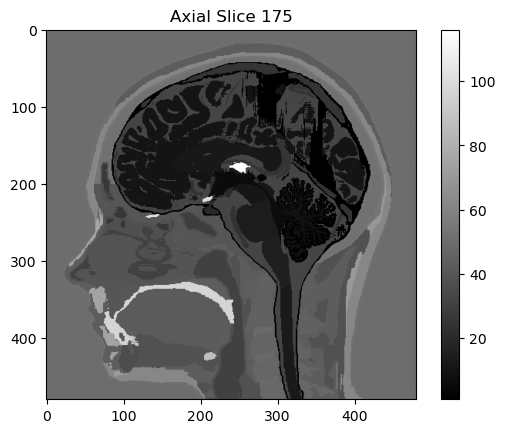

In [2]:
%matplotlib inline
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

mida_filepath = "/Users/c3495249/Coding/Gemini_Pro_Vasculature/data/MIDA_v1.nii" # Change this

try:
    img = nib.load(mida_filepath)
    data = img.get_fdata()
    affine = img.affine
    header = img.header

    print(f"Shape: {data.shape}")
    print(f"Voxel sizes (zooms): {header.get_zooms()}")
    print(f"Affine:\n{affine}")
    print(f"Data type: {data.dtype}")

    # If you suspect it's a label map (integer values)
    if np.issubdtype(data.dtype, np.integer) or np.all(np.mod(data, 1) == 0):
        unique_labels = np.unique(data.astype(int))
        print(f"Unique integer labels found: {unique_labels}")
        
        # You would need to know what these labels mean. Example:
        # GM_LABEL = 3 
        # WM_LABEL = 2
        
        # To create a GM mask (replace GM_LABEL with actual value):
        # gm_mask_data = (data == GM_LABEL).astype(np.uint8)
        # gm_img = nib.Nifti1Image(gm_mask_data, affine, header)
        # nib.save(gm_img, "mida_gm_mask.nii.gz")
        # print("Saved mida_gm_mask.nii.gz (example)")

    # Display a slice (e.g., middle axial slice)
    slice_idx = data.shape[2] // 2
    plt.imshow(np.rot90(data[:, :, slice_idx]), cmap='gray')
    plt.title(f"Axial Slice {slice_idx}")
    plt.colorbar()
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {mida_filepath}")
except Exception as e:
    print(f"An error occurred: {e}")